In [1]:
%matplotlib inline
import torch
import matplotlib.pyplot as plt
from d2l import torch as d2l

# 注意力机制
在现代社会中, 注意力不是免费的, 比如游戏、流媒体视频等形式的活动吸引着人们的注意力, 从而推动消费

同时注意力也是稀缺的, 人类的视觉神经单元每秒钟可以接受到 $10^8$ 位的信息, 远远超过了大脑可以完全处理的水平, 但是人类的祖先已经从经验(或者称为数据)中认识并非所有感官的所有输入都是一样的, 这里这一种之将注意力引向一小部分信息的能力, 推动了人类的进步

## 生物学中的注意力提示
注意力提示可以分为非自主性注意力提示和自主性注意力提示

**非自主性提示:** 基于环境中物体的突出性和易见性, 比如颜色鲜艳(或者信息量比较大的事或者物)就会不有自主地引起人们的注意

**自主性提示:** 此时注意力受到大脑的控制, 依赖于任务的注意力提示

## 查询、键和值
下面讨论如何基于自主性和非自主性的注意力机制使用神经网络来设计注意力机制的框架

考虑一个相对简单的情况, 也就是仅仅使用非自主性提示, 要将选择偏向于感官输入, 那么可以简单地使用参数化的全连接层, 或者非参数化的最大汇聚层和平均汇聚层

"是否包含自主性提示"将注意力机制和全连接层或者汇聚层区分开来, 在注意力机制背景下, 自主性提示被称为查询(`Q`), 在给定任何查询, 注意力机制通过注意力汇聚将选择引导至感官输入, 在注意力机制中, 这些 感官输入称为值(`V`), 并且每一个值都和一个键匹配, 可以想象为感官输入的非自主性提示 ; 如下图, 可以根据给定的查询(`Q`) 以及键 (`V`) 进行匹配, 从而得到最匹配的值(`V`, 感官输入):
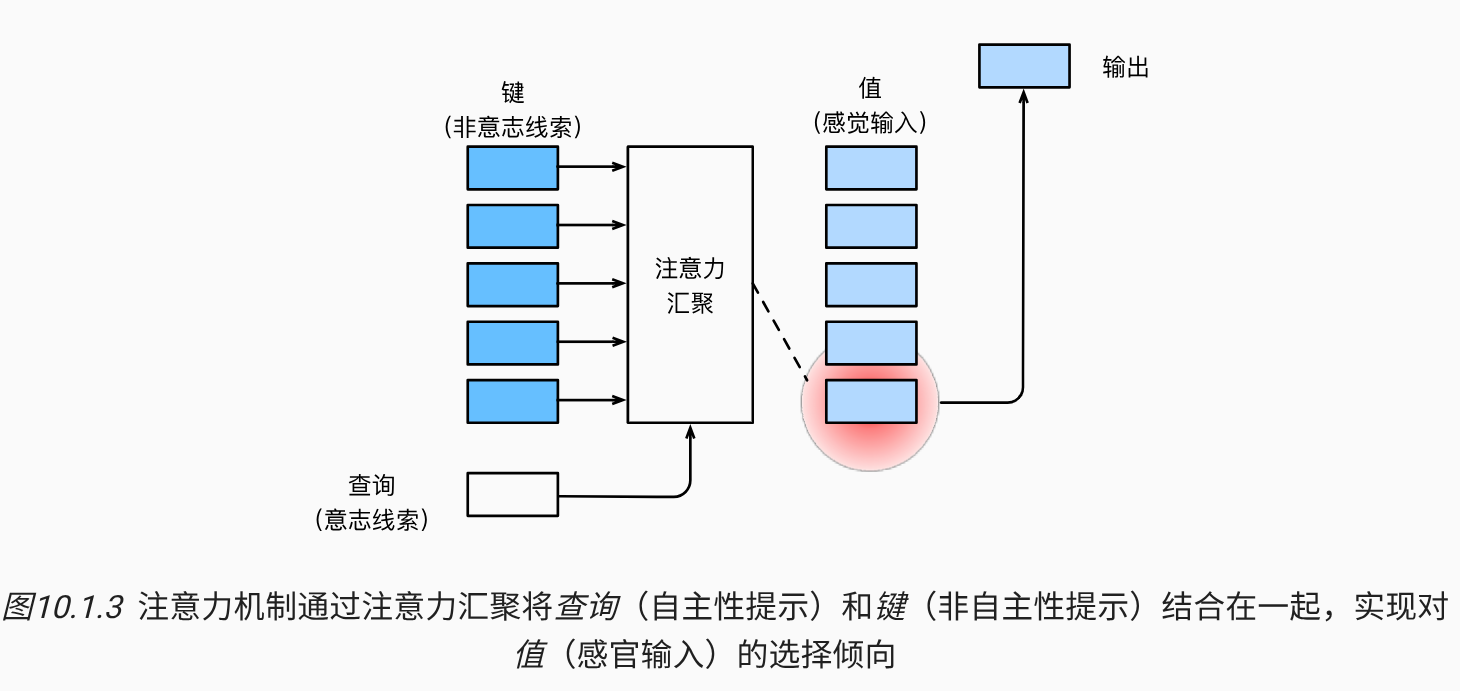

## 注意力机制的可视化
平均汇聚层可以看成输入的加权平均, 并且各输入的权重是一样的, 并且注意力汇聚得到的是加权平均总和值, 其中权重是在给定的查询和不同的键之间的计算得出的

可以看作 `V` 是由 `Q` 和 `K` 共同作用得到的, 这里使用热力图表示注意力权重

In [2]:
#@save
def show_heatmaps(matrices, xlabel, ylabel, titles=None, figsize=(2.5, 2.5),
                  cmap='Reds'):
    """显示矩阵热图"""
    d2l.use_svg_display() # 配置显示选项
    num_rows, num_cols = matrices.shape[0], matrices.shape[1]
    fig, axes = d2l.plt.subplots(num_rows, num_cols, figsize=figsize,
                                 sharex=True, sharey=True, squeeze=False)
    for i, (row_axes, row_matrices) in enumerate(zip(axes, matrices)):
        for j, (ax, matrix) in enumerate(zip(row_axes, row_matrices)):
            pcm = ax.imshow(matrix.detach().numpy(), cmap=cmap) # 使用cmap系颜色映射
            if i == num_rows - 1:
                ax.set_xlabel(xlabel)
            if j == 0:
                ax.set_ylabel(ylabel)
            if titles:
                ax.set_title(titles[j])
    fig.colorbar(pcm, ax=axes, shrink=0.6);

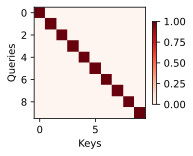

In [3]:
# 测试
attention_weights = torch.eye(10).reshape((1, 1, 10, 10)) # 注意对于每一个样本的注意力矩阵
show_heatmaps(attention_weights, xlabel='Keys', ylabel='Queries',cmap='Reds')